# Customer Behavior Analysis

### Objective

The objective of this analysis is to leverage **SQL and Python** to understand customer behavior, engagement, and purchasing patterns on ShopEasy’s platform. By analyzing customer journey data, transaction records, and feedback, we aim to:

- **Identify factors affecting customer engagement** by examining website interactions, browsing behavior, and marketing response rates. 

- **Investigate reasons for declining conversion rates** by analyzing drop-off points in the customer journey.  

- **Assess marketing campaign effectiveness** by correlating spending with actual customer conversions.
  
- **Extract insights from customer feedback** to understand pain points and improve overall experience.  

The findings from this analysis will provide **data-driven recommendations** to optimize marketing strategies, enhance customer retention, and ultimately boost revenue.


In [3]:
# Libraries to import

import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from tabulate import tabulate
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


#### Available Data sets as CSV files

1). Customer Journey

2). Customer Reviews

3). Customers

4). Engagement Data

5). Geography

6). Products

##### Loading the CSV files to analyse the data for duplicates, missing data

In [4]:
# 1). Customer journey data set
customer_journey= pd.read_csv("Customer_Behaviour_Analysis\\customer_journey.csv")
customer_journey.head()

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,NaN
1,2,94,11,2025-07-09,Checkout,Drop-off,NaN
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,NaN
4,5,91,10,2023-02-11,Homepage,Click,156.0


In [5]:
# check info

customer_journey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JourneyID   100 non-null    int64  
 1   CustomerID  100 non-null    int64  
 2   ProductID   100 non-null    int64  
 3   VisitDate   100 non-null    object 
 4   Stage       100 non-null    object 
 5   Action      100 non-null    object 
 6   Duration    86 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [ ]:
customer_journey.describe()   # customer id 100 is missing

,journeyid,customerid,productid,duration
count,100.000000,100.000000,100.000000,86.000000
mean,50.500000,51.090000,11.000000,166.534884
std,29.011492,29.383255,6.095204,84.487479
min,1.000000,1.000000,1.000000,13.000000
25%,25.750000,24.750000,6.000000,100.250000
50%,50.500000,52.000000,11.000000,182.000000
75%,75.250000,77.250000,16.250000,238.750000
max,100.000000,99.000000,20.000000,298.000000


In [ ]:
# Check whether customerid 100 is in data or not 

customer_100 = customer_journey[customer_journey['CustomerID']==100]

customer_100

,journeyid,customerid,productid,visitdate,stage,action,duration


In [4]:
# 2). Customer Review 
customer_reviews= pd.read_csv("Customer_Behaviour_Analysis\\customer_reviews.csv")
customer_reviews.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."


In [ ]:
customer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewID    100 non-null    int64 
 1   CustomerID  100 non-null    int64 
 2   ProductID   100 non-null    int64 
 3   ReviewDate  100 non-null    object
 4   Rating      100 non-null    int64 
 5   ReviewText  100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
# 3). Customers
customer_csv= pd.read_csv("Customer_Behaviour_Analysis\\customers.csv")

customer_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    100 non-null    int64 
 1   CustomerName  100 non-null    object
 2   Email         100 non-null    object
 3   Gender        100 non-null    object
 4   Age           100 non-null    int64 
 5   GeographyID   100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [7]:
customer_csv.head()

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4


In [8]:
# 4). Engagement Data
engagement_data = pd.read_csv("Customer_Behaviour_Analysis\\engagement_data.csv")

engagement_data.head()

,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined
0,1,39,Blog,190,2023-08-30,1,9,1883-671
1,2,48,Blog,114,2023-03-28,18,20,5280-532
2,3,16,video,32,2023-12-08,7,14,1905-204
3,4,43,Video,17,2025-01-21,19,20,2766-257
4,5,16,newsletter,306,2024-02-21,6,15,5116-1524


In [ ]:
# 5). Geography 

geography_csv= pd.read_csv("Customer_Behaviour_Analysis\\geography.csv")

geography_csv.head()

,GeographyID,Country,City
0,1,UK,London
1,2,Germany,Berlin
2,3,France,Paris
3,4,Spain,Madrid
4,5,Italy,Rome


In [ ]:
geography_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   geographyid  10 non-null     int64 
 1   country      10 non-null     object
 2   city         10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [ ]:
geography_csv.describe()

,geographyid
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [9]:
# 6).Products

products_csv= pd.read_csv("Customer_Behaviour_Analysis\\products.csv")

products_csv.head()

,ProductID,ProductName,Category,Price
0,1,Running Shoes,Sports,223.75
1,2,Fitness Tracker,Sports,196.68
2,3,Yoga Mat,Sports,485.32
3,4,Dumbbells,Sports,26.21
4,5,Soccer Ball,Sports,41.26


In [ ]:
products_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    20 non-null     int64  
 1   ProductName  20 non-null     object 
 2   Category     20 non-null     object 
 3   Price        20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [ ]:
products_csv.describe()

,productid,price
count,20.00000,20.000000
mean,10.50000,205.405500
std,5.91608,149.461816
min,1.00000,26.210000
25%,5.75000,44.262500
50%,10.50000,210.215000
75%,15.25000,288.412500
max,20.00000,485.320000


#### Missing customer ids from customer journey dataset

In [ ]:
# Load both datasets (adjust paths)
customers_csv = pd.read_csv('Customer_Behaviour_Analysis\\customers.csv')
customer_journey = pd.read_csv('Customer_Behaviour_Analysis\\customer_journey.csv')

# Lowercase columns for consistency
customers_csv.columns = customers_csv.columns.str.lower()
customer_journey.columns = customer_journey.columns.str.lower()

# Step 1: Find all Customer IDs in customers.csv
all_customer_ids = set(customers_csv['customerid'])

# Step 2: Find Customer IDs present in customer_journey.csv
journey_customer_ids = set(customer_journey['customerid'])

# Step 3: Find missing IDs
missing_in_journey = all_customer_ids - journey_customer_ids

print(f"Customer IDs missing from customer_journey.csv: {missing_in_journey}")
print(f"Total missing: {len(missing_in_journey)}")


Customer IDs missing from customer_journey.csv: {3, 6, 7, 8, 10, 11, 16, 18, 26, 27, 28, 35, 37, 39, 41, 50, 53, 57, 59, 61, 62, 66, 68, 71, 72, 73, 74, 76, 84, 85, 87, 90, 96, 98, 100}
Total missing: 35


## Conversion of CSV files into Structured SQL tables through Python 

In [14]:
# Step 1: Connect to MySQL without selecting a database
def connect_to_mysql():
    try:
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="1234"
        )
        if conn.is_connected():
            print("Connected to MySQL Server!")
        return conn
    except Error as e:
        print(f"Connection error: {e}")

In [15]:
# Step 2: Create database schema dynamically
def create_database(cursor, db_name):
    try:
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS `{db_name}`")
        print(f"Database `{db_name}` is ready.")
    except Error as e:
        print(f"Database creation error: {e}")

In [16]:
# Step 3: Connect to the specific database
def connect_to_sql(db_name):
    try:
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="1234",
            database=db_name
        )
        if conn.is_connected():
            print(f"Connected to `{db_name}` database!")
        return conn
    except Error as e:
        print(f"Connection error: {e}")

In [17]:
# Step 4: Create SQL Table Dynamically from DataFrame
def create_table_from_df(cursor, table_name, df):
    cols = []
    for col in df.columns:
        dtype = df[col].dtype
        if "int" in str(dtype):
            sql_type = "INT"
        elif "float" in str(dtype):
            sql_type = "FLOAT"
        else:
            sql_type = "VARCHAR(255)"
        cols.append(f"`{col}` {sql_type}")
    sql = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({', '.join(cols)})"
    cursor.execute(sql)
    print(f"Table `{table_name}` created or already exists.")

### Automation function for Loader + Cleaner data + Logs + Errors

In [ ]:
# Step 5: Master Automation Function (Loader + Cleaner + Logs + Errors)
def process_csv(csv_path, table_name, db_name):
    try:
        print(f"\n Processing `{table_name}`")

        # Load CSV
        df = pd.read_csv(csv_path)

        # Universal Cleaning (applies to all tables)
        df.dropna(how='all', inplace=True)  # Remove fully empty rows
        df.columns = df.columns.str.lower().str.replace(" ", "_")
        df.drop_duplicates(inplace=True)

        # Strip whitespaces from string columns
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = df[col].str.strip()

        # Table-specific Cleaning
        if table_name == 'customer_journey' and 'duration' in df.columns:
            df['duration'] = df['duration'].fillna(df['duration'].mean())        # customer journey analysis data set's null value replaced by mean duration

        # Replace NaN with None (for SQL compatibility)
        df = df.where(pd.notnull(df), None)

        print(f"Cleaned `{table_name}` - {df.shape[0]} rows, {df.shape[1]} columns")

        # Connect to DB
        conn = connect_to_sql(db_name)
        cursor = conn.cursor()

        # Create Table and Load Data
        create_table_from_df(cursor, table_name, df)

        placeholders = ', '.join(['%s'] * len(df.columns))
        cols = ', '.join([f"`{col}`" for col in df.columns])
        sql = f"INSERT INTO `{table_name}` ({cols}) VALUES ({placeholders})"

        row_count = 0
        for _, row in df.iterrows():
            cursor.execute(sql, tuple(row))
            row_count += 1

        conn.commit()
        print(f"Inserted {row_count} rows into `{table_name}` successfully!")

        cursor.close()
        conn.close()
    except Error as e:
        print(f"Error processing `{table_name}`: {e}")

In [ ]:
# Step 6: Full pipeline execution
db_name = "customer_behaviour_analysis"

# Create database first
conn_root = connect_to_mysql()
cursor_root = conn_root.cursor()
create_database(cursor_root, db_name)
cursor_root.close()
conn_root.close()

Connected to MySQL Server!
Database `customer_behaviour_analysis` is ready.


In [20]:
# Step 7: Call the function for each CSV file individually
process_csv('Customer_Behaviour_Analysis\\customer_journey.csv', 'customer_journey', db_name)
process_csv('Customer_Behaviour_Analysis\\customer_reviews.csv', 'customer_reviews', db_name)
process_csv('Customer_Behaviour_Analysis\\customers.csv', 'customers', db_name)
process_csv('Customer_Behaviour_Analysis\\engagement_data.csv', 'engagement_data', db_name)
process_csv('Customer_Behaviour_Analysis\\geography.csv', 'geography', db_name)
process_csv('Customer_Behaviour_Analysis\\products.csv', 'products', db_name)


 Processing `customer_journey`
Cleaned `customer_journey` - 100 rows, 7 columns
Connected to `customer_behaviour_analysis` database!
Table `customer_journey` created or already exists.
Inserted 100 rows into `customer_journey` successfully!

 Processing `customer_reviews`
Cleaned `customer_reviews` - 100 rows, 6 columns
Connected to `customer_behaviour_analysis` database!
Table `customer_reviews` created or already exists.
Inserted 100 rows into `customer_reviews` successfully!

 Processing `customers`
Cleaned `customers` - 100 rows, 6 columns
Connected to `customer_behaviour_analysis` database!
Table `customers` created or already exists.
Inserted 100 rows into `customers` successfully!

 Processing `engagement_data`
Cleaned `engagement_data` - 100 rows, 8 columns
Connected to `customer_behaviour_analysis` database!
Table `engagement_data` created or already exists.
Inserted 100 rows into `engagement_data` successfully!

 Processing `geography`
Cleaned `geography` - 10 rows, 3 column

## Data Exploration through SQL queries

 Row count validations

 Null checks across tables

 Duplicate checks

 Join validations to check integrity across tables

 Orphan record checks

 Cardinality checks

 Distribution insights for key metrics

In [2]:
import mysql.connector
import pandas as pd

# Connect to your database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="customer_behaviour_analysis"
)

cursor = conn.cursor()

# Dictionary of queries (query_number : query_sql)
queries = {
    "Query 1 - customer_journey table": "SELECT * FROM customer_journey;",
    "Query 2 - customer_reviews table": "SELECT * FROM customer_reviews;",
    "Query 3 - customers table": "SELECT * FROM customers;",
    "Query 4 - engagement_data table": "SELECT * FROM engagement_data;",
    "Query 5 - geography table": "SELECT * FROM geography;",
    "Query 6 - products table": "SELECT * FROM products;",
    "Query 7 - Nulls in customer_journey": """
        SELECT SUM(CASE WHEN duration IS NULL THEN 1 ELSE 0 END) AS null_duration,
               SUM(CASE WHEN customerid IS NULL THEN 1 ELSE 0 END) AS null_customerid
        FROM customer_journey;
    """,
    "Query 8 - Nulls in customer_reviews": """
        SELECT SUM(CASE WHEN reviewtext IS NULL THEN 1 ELSE 0 END) AS null_reviewtext,
               SUM(CASE WHEN customerid IS NULL THEN 1 ELSE 0 END) AS null_customerid
        FROM customer_reviews;
    """,
    "Query 9 - Nulls in customers": """
        SELECT SUM(CASE WHEN geographyid IS NULL THEN 1 ELSE 0 END) AS null_geographyid,
               SUM(CASE WHEN customername IS NULL THEN 1 ELSE 0 END) AS null_customername
        FROM customers;
    """,
    "Query 10 - Nulls in engagement_data": """
        SELECT SUM(CASE WHEN contentid IS NULL THEN 1 ELSE 0 END) AS null_contentid,
               SUM(CASE WHEN campaignid IS NULL THEN 1 ELSE 0 END) AS null_campaignid,
               SUM(CASE WHEN productid IS NULL THEN 1 ELSE 0 END) AS null_productid
        FROM engagement_data;
    """,
    "Query 11 - Duplicate check for customer_journey": """
        SELECT customerid, productid, visitdate, stage, action, COUNT(*)
        FROM customer_journey
        GROUP BY customerid, productid, visitdate, stage, action, duration
        HAVING COUNT(*) > 1;
    """,
    "Query 12 - Duplicate check for customer_reviews": """
        SELECT customerid, productid, reviewdate, rating, reviewtext, COUNT(*)
        FROM customer_reviews
        GROUP BY customerid, productid, reviewdate, rating, reviewtext
        HAVING COUNT(*) > 1;
    """,
    "Query 13 - Duplicate check for customers": """
        SELECT customername, email, gender, age, geographyid, COUNT(*)
        FROM customers
        GROUP BY customername, email, gender, age, geographyid
        HAVING COUNT(*) > 1;
    """,
    "Query 14 - Join check between customers, journey, reviews": """
        SELECT c.customerid, c.customername, cj.journeyid, cr.reviewid, cj.productid
        FROM customers AS c
        INNER JOIN customer_journey AS cj ON c.customerid = cj.customerid
        INNER JOIN customer_reviews AS cr ON c.customerid = cr.customerid AND cj.productid = cr.productid;
    """,
    "Query 15 - Reviews without matching customers": """
        SELECT * FROM customer_reviews WHERE customerid NOT IN (SELECT customerid FROM customers);
    """,
    "Query 16 - Journey without matching customers": """
        SELECT * FROM customer_journey WHERE customerid NOT IN (SELECT customerid FROM customers);
    """,
    "Query 17 - Engagement data without matching products": """
        SELECT * FROM engagement_data WHERE productid NOT IN (SELECT productid FROM products);
    """,
    "Query 18 - Unused products": """
        SELECT * FROM products WHERE productid NOT IN (SELECT productid FROM customer_journey)
        AND productid NOT IN (SELECT productid FROM customer_reviews);
    """,
    "Query 19 - Cardinality (Customer -> Journey)": """
        SELECT customerid, COUNT(DISTINCT journeyid) AS num_journeys
        FROM customer_journey
        GROUP BY customerid
        ORDER BY num_journeys DESC;
    """,
    "Query 20 - Cardinality (Customer -> Reviews)": """
        SELECT customerid, COUNT(reviewid) AS num_reviews
        FROM customer_reviews
        GROUP BY customerid
        ORDER BY num_reviews DESC;
    """,
    "Query 21 - Cardinality (Product -> Journey)": """
        SELECT productid, COUNT(DISTINCT journeyid) AS num_journeys
        FROM customer_journey
        GROUP BY productid
        ORDER BY num_journeys DESC;
    """,
    "Query 22 - Cardinality (Product -> Reviews)": """
        SELECT productid, COUNT(reviewid) AS num_reviews
        FROM customer_reviews
        GROUP BY productid
        ORDER BY num_reviews DESC;
    """,
    "Query 23 - Cardinality (Product -> Engagements)": """
        SELECT productid, COUNT(engagementid) AS num_engagements
        FROM engagement_data
        GROUP BY productid
        ORDER BY num_engagements DESC;
    """,
    "Query 24 - Engagement Type Distribution": """
        SELECT contenttype, COUNT(*) AS count
        FROM engagement_data
        GROUP BY contenttype
        ORDER BY count DESC;
    """,
    "Query 25 - Duration Distribution": """
        SELECT MIN(duration), MAX(duration), AVG(duration), STDDEV(duration)
        FROM customer_journey;
    """,
    "Query 26 - Ratings Distribution": """
        SELECT rating, COUNT(*)
        FROM customer_reviews
        GROUP BY rating
        ORDER BY rating DESC;
    """
}

# Execute and print queries
for label, sql in queries.items():
    print(f"\n===== {label} =====\n")
    cursor.execute(sql)
    rows = cursor.fetchall()
    columns = [i[0] for i in cursor.description]

    if rows:
        df = pd.DataFrame(rows, columns=columns)
        print(tabulate(df, headers='keys', tablefmt='psql'))
    else:
        print("No results found.")

# Close the connection
cursor.close()
conn.close()



===== Query 1 - customer_journey table =====

+----+-------------+--------------+-------------+-------------+-------------+----------+------------+
|    |   journeyid |   customerid |   productid | visitdate   | stage       | action   |   duration |
|----+-------------+--------------+-------------+-------------+-------------+----------+------------|
|  0 |           1 |           64 |          18 | 2024-06-10  | Checkout    | Drop-off |    166.535 |
|  1 |           2 |           94 |          11 | 2025-07-09  | Checkout    | Drop-off |    166.535 |
|  2 |           3 |           34 |           8 | 2024-06-14  | ProductPage | View     |    235     |
|  3 |           4 |           33 |          18 | 2025-05-28  | Checkout    | Drop-off |    166.535 |
|  4 |           5 |           91 |          10 | 2023-02-11  | Homepage    | Click    |    156     |
|  5 |           6 |           54 |          11 | 2025-12-19  | Homepage    | View     |    264     |
|  6 |           7 |           80 |

## Customer Journey & Engagement Analysis Through SQL Queries

In [ ]:
# Step 1: Database Connection
conn = mysql.connector.connect(
    host="localhost", 
    user="root",
    password="1234",
    database="customer_behaviour_analysis"
)
cursor = conn.cursor()

# Step 2: Define your cleaned-up queries 

queries = [
    # Query 1: Drop-off rate at each stage
    """
    WITH journey_counts AS (
        SELECT stage, COUNT(DISTINCT customerid) AS customers_at_stage
        FROM customer_journey
        GROUP BY stage
    ),
    total_customers AS (
        SELECT COUNT(DISTINCT customerid) AS total_customers
        FROM customer_journey
    )
    SELECT jc.stage, 
           jc.customers_at_stage,
           CONCAT(ROUND(100 * (1 - jc.customers_at_stage / tc.total_customers), 2), '%') AS drop_off_rate
    FROM journey_counts jc, total_customers tc
    ORDER BY jc.stage;
    """,

    # Query 2: Unique customers per stage
    """
    SELECT stage, COUNT(DISTINCT customerid) AS unique_customers
    FROM customer_journey
    GROUP BY stage
    ORDER BY unique_customers DESC;
    """,

    # Query 3: Average duration per stage
    """
    SELECT stage, ROUND(AVG(duration), 2) AS avg_duration
    FROM customer_journey
    GROUP BY stage
    ORDER BY avg_duration DESC;
    """,

    # Query 4: Stage with the highest drop-off percentage
    """
    WITH stage_counts AS (
        SELECT stage, COUNT(DISTINCT customerid) AS customer_count
        FROM customer_journey
        GROUP BY stage
    ),
    total_customers AS (
        SELECT COUNT(DISTINCT customerid) AS total_count FROM customer_journey
    )
    SELECT 
        sc.stage,
        ROUND(100.0 * sc.customer_count / tc.total_count, 2) AS dropoff_percentage
    FROM stage_counts sc, total_customers tc
    ORDER BY dropoff_percentage ASC
    LIMIT 1;
    """,

    # Query 5: Customer journey depth ranking
    """
    WITH stage_depth AS (
        SELECT customerid, MAX(stage) AS max_stage
        FROM customer_journey
        GROUP BY customerid
    )
    SELECT customerid, max_stage,
           RANK() OVER (ORDER BY max_stage DESC) AS customer_rank
    FROM stage_depth;
    """,

    # Query 6: Campaign & content type leading to checkout
    """
    SELECT 
        ed.campaignid,
        ed.contenttype,
        COUNT(DISTINCT cj.customerid) AS num_customers_reached_checkout
    FROM engagement_data ed
    JOIN customer_journey cj 
        ON ed.productid = cj.productid
    WHERE cj.stage = 'Checkout'
    GROUP BY ed.campaignid, ed.contenttype
    ORDER BY num_customers_reached_checkout DESC;
    """,

    # Query 7: Homepage to checkout conversion rate by content type
    """
    SELECT 
        ed.contenttype,
        COUNT(DISTINCT CASE WHEN cj.stage = 'Homepage' THEN cj.customerid END) AS homepage_visits,
        COUNT(DISTINCT CASE WHEN cj.stage = 'ProductPage' THEN cj.customerid END) AS productpage_visits,
        COUNT(DISTINCT CASE WHEN cj.stage = 'Checkout' THEN cj.customerid END) AS checkout_visits,
        ROUND(
            100.0 * COUNT(DISTINCT CASE WHEN cj.stage = 'Checkout' THEN cj.customerid END) / 
            NULLIF(COUNT(DISTINCT CASE WHEN cj.stage = 'Homepage' THEN cj.customerid END), 0),
        2) AS homepage_to_checkout_rate_pct
    FROM engagement_data ed
    JOIN customer_journey cj 
        ON ed.productid = cj.productid
    GROUP BY ed.contenttype
    ORDER BY homepage_to_checkout_rate_pct DESC;
    """,

    # Query 8: Conversion rate by campaign & content type
    """
    SELECT 
        ed.campaignid,
        ed.contenttype,
        COUNT(DISTINCT CASE WHEN cj.stage = 'Checkout' THEN cj.customerid END) AS checkout_visits,
        COUNT(DISTINCT cj.customerid) AS total_customers_in_journey,
        ROUND(
            100.0 * COUNT(DISTINCT CASE WHEN cj.stage = 'Checkout' THEN cj.customerid END) / 
            NULLIF(COUNT(DISTINCT cj.customerid), 0),
        2) AS conversion_rate_pct
    FROM engagement_data ed
    JOIN customer_journey cj 
        ON ed.productid = cj.productid
    GROUP BY ed.campaignid, ed.contenttype
    ORDER BY conversion_rate_pct DESC;
    """,

    # Query 9: Total engagements by campaign
    """
    SELECT 
        campaignid, 
        SUM(viewsclickscombined) AS total_engagements
    FROM 
        engagement_data
    GROUP BY 
        campaignid
    ORDER BY 
        total_engagements DESC;
    """,

    # Query 10: Total engagements by content type
    """
    SELECT 
        contenttype, 
        SUM(viewsclickscombined) AS total_engagements
    FROM 
        engagement_data
    GROUP BY 
        contenttype
    ORDER BY 
        total_engagements DESC;
    """,

    # Query 11: Average engagement by campaign
    """
    SELECT 
        campaignid, 
        AVG(viewsclickscombined) AS avg_engagement
    FROM 
        engagement_data
    GROUP BY 
        campaignid
    ORDER BY 
        avg_engagement DESC;
    """,

    # Query 12: Monthly engagement trend
    """
    SELECT 
        DATE_FORMAT(engagementdate, '%Y-%m') AS month,
        SUM(viewsclickscombined) AS total_engagements
    FROM 
        engagement_data
    GROUP BY 
        month
    ORDER BY 
        month;
    """,

    # Query 13: Total engagements by product
    """
    SELECT 
        productid,
        SUM(viewsclickscombined) AS total_engagements
    FROM 
        engagement_data
    GROUP BY 
        productid
    ORDER BY 
        total_engagements DESC;
    """,

    # Query 14: Average engagement by product
    """
    SELECT 
        productid,
        AVG(viewsclickscombined) AS avg_engagement
    FROM 
        engagement_data
    GROUP BY 
        productid
    ORDER BY 
        avg_engagement DESC;
    """,

    # Query 15: Average engagement by product & content type
    """
    SELECT 
        productid,
        contenttype,
        AVG(viewsclickscombined) AS avg_engagement
    FROM 
        engagement_data
    GROUP BY 
        productid, contenttype
    ORDER BY 
        avg_engagement DESC;
    """
]


# Step 3: Execute Queries in a Loop
for idx, query in enumerate(queries, start=1):
    print(f"\n Running Query {idx}...")
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Get column names

    # Step 4: Pretty-print result as a table
    print(tabulate(result, headers=columns, tablefmt="grid"))

# Step 5: Close Connection
cursor.close()
conn.close()



 Running Query 1...
+-------------+----------------------+-----------------+
| stage       |   customers_at_stage | drop_off_rate   |
+=============+======================+=================+
| Checkout    |                   19 | 70.77%          |
+-------------+----------------------+-----------------+
| Homepage    |                   40 | 38.46%          |
+-------------+----------------------+-----------------+
| ProductPage |                   24 | 63.08%          |
+-------------+----------------------+-----------------+

 Running Query 2...
+-------------+--------------------+
| stage       |   unique_customers |
+=============+====================+
| Homepage    |                 40 |
+-------------+--------------------+
| ProductPage |                 24 |
+-------------+--------------------+
| Checkout    |                 19 |
+-------------+--------------------+

 Running Query 3...
+-------------+----------------+
| stage       |   avg_duration |
+=============+==========

## Customer Reviews Analysis

In [6]:
from tabulate import tabulate
import mysql.connector

# Step 1: Database Connection
conn = mysql.connector.connect(
    host="localhost", 
    user="root",
    password="1234",
    database="customer_behaviour_analysis"
)
cursor = conn.cursor()

# Step 2: Define your cleaned-up queries 

queries = [
# 1). Highest rated products  
"""
SELECT 
    productid,
    ROUND(AVG(rating), 2) AS avg_rating,
    COUNT(*) AS total_reviews
FROM 
    customer_reviews
GROUP BY 
    productid
HAVING COUNT(*) >= 5
ORDER BY 
    avg_rating DESC
LIMIT 10;
""",

# 2). Lowest rated product

"""
SELECT 
    productid,
    ROUND(AVG(rating), 2) AS avg_rating,
    COUNT(*) AS total_reviews
FROM 
    customer_reviews
GROUP BY 
    productid
HAVING COUNT(*) >= 5
ORDER BY 
    avg_rating ASC
LIMIT 10;
""",

# 3). Distribution of ratings
"""
SELECT 
    rating,
    COUNT(*) AS review_count
FROM 
    customer_reviews
GROUP BY 
    rating
ORDER BY 
    rating DESC;

""",

# Correlating rating with other attributes

# 4). Average rating by category

"""
SELECT 
    p.category,
    ROUND(AVG(cr.rating), 2) AS avg_rating,
    COUNT(*) AS total_reviews
FROM 
    customer_reviews cr
JOIN 
    products p ON cr.productid = p.productid
GROUP BY 
    p.category
ORDER BY 
    avg_rating DESC;
""",

# 5). Average rating by region

"""
SELECT 
    c.geographyid AS region,
    ROUND(AVG(r.rating), 2) AS avg_rating,
    COUNT(*) AS total_reviews
FROM 
    customer_reviews r
JOIN 
    customers c ON r.customerid = c.customerid
GROUP BY 
    c.geographyid
ORDER BY 
    avg_rating DESC;
""",

# 6). Best performing products per region(based on avg rating)

"""
SELECT 
    region,
    productid,
    avg_rating,
    total_reviews
FROM (
    SELECT 
        c.geographyid AS region,
        r.productid,
        ROUND(AVG(r.rating), 2) AS avg_rating,
        COUNT(*) AS total_reviews
    FROM 
        customer_reviews r
    JOIN 
        customers c ON r.customerid = c.customerid
    GROUP BY 
        c.geographyid, r.productid
) AS aggregated
WHERE (
    SELECT COUNT(*) 
    FROM (
        SELECT 
            ROUND(AVG(r2.rating), 2) AS avg_rating_inner
        FROM 
            customer_reviews r2
        JOIN 
            customers c2 ON r2.customerid = c2.customerid
        WHERE 
            c2.geographyid = aggregated.region
        GROUP BY 
            r2.productid
        HAVING ROUND(AVG(r2.rating), 2) > aggregated.avg_rating
    ) AS higher_rated
) < 3 -- For Top 3
ORDER BY 
    region ASC, avg_rating DESC;


""",

# 7). Review distribution by region(how active regions are in giving reviews)

"""
SELECT 
    c.geographyid AS region,
    COUNT(*) AS total_reviews,
    COUNT(DISTINCT r.customerid) AS unique_customers
FROM 
    customer_reviews r
JOIN 
    customers c ON r.customerid = c.customerid
GROUP BY 
    c.geographyid
ORDER BY 
    total_reviews DESC;
"""]

    # Step 3: Execute Queries in a Loop
for idx, query in enumerate(queries, start=1):
    print(f"\n Running Query {idx}...")
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Get column names

    # Step 4: Pretty-print result as a table
    print(tabulate(result, headers=columns, tablefmt="grid"))

# Step 5: Close Connection
cursor.close()
conn.close()



 Running Query 1...
+-------------+--------------+-----------------+
|   productid |   avg_rating |   total_reviews |
+=============+==============+=================+
|          19 |         4.4  |               5 |
+-------------+--------------+-----------------+
|          15 |         4    |               6 |
+-------------+--------------+-----------------+
|          11 |         4    |               6 |
+-------------+--------------+-----------------+
|          17 |         3.89 |               9 |
+-------------+--------------+-----------------+
|           6 |         3.86 |               7 |
+-------------+--------------+-----------------+
|           3 |         3.71 |               7 |
+-------------+--------------+-----------------+
|          13 |         3.67 |               9 |
+-------------+--------------+-----------------+
|           2 |         3.57 |               7 |
+-------------+--------------+-----------------+
|           9 |         3.4  |               5 |

## Sentiment Analysis

In [ ]:
df = pd.read_csv("Customer_Behaviour_Analysis\\customer_reviews.csv")  
print(df.head())  # should include a 'review_text' column

# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))  # convert to string in case of NaN
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment function
df['sentiment'] = df['ReviewText'].apply(get_sentiment)

# Count the sentiment distribution
print(df['sentiment'].value_counts())


   ReviewID  CustomerID  ProductID  ReviewDate  Rating  \
0         1          77         18  2023-12-23       3   
1         2          80         19  2024-12-25       5   
2         3          50         13  2025-01-26       4   
3         4          78         15  2025-04-21       3   
4         5          64          2  2023-07-16       3   

                                 ReviewText  
0   Average  experience,  nothing  special.  
1            The  quality  is    top-notch.  
2   Five  stars  for  the  quick  delivery.  
3  Good  quality,  but  could  be  cheaper.  
4   Average  experience,  nothing  special.  
sentiment
Positive    84
Negative    11
Neutral      5
Name: count, dtype: int64


In [3]:
print(df.columns)

Index(['ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'Rating',
       'ReviewText', 'sentiment'],
      dtype='object')


## Visualize Sentiment Distribution

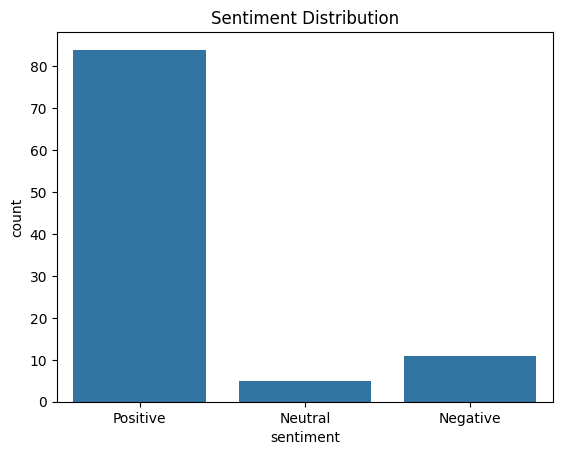

In [ ]:
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.show()


## Sentiment Vs Rating Relationship

In [5]:
pd.crosstab(df['Rating'], df['sentiment'])

sentiment,Negative,Neutral,Positive
Rating,,,
1,2,1,0
2,2,1,3
3,7,0,22
4,0,2,37
5,0,1,22


## Sentiment Vs Time trend(Temporal Analysis)

<Axes: title={'center': 'Sentiment Trend Over Time'}, xlabel='month'>

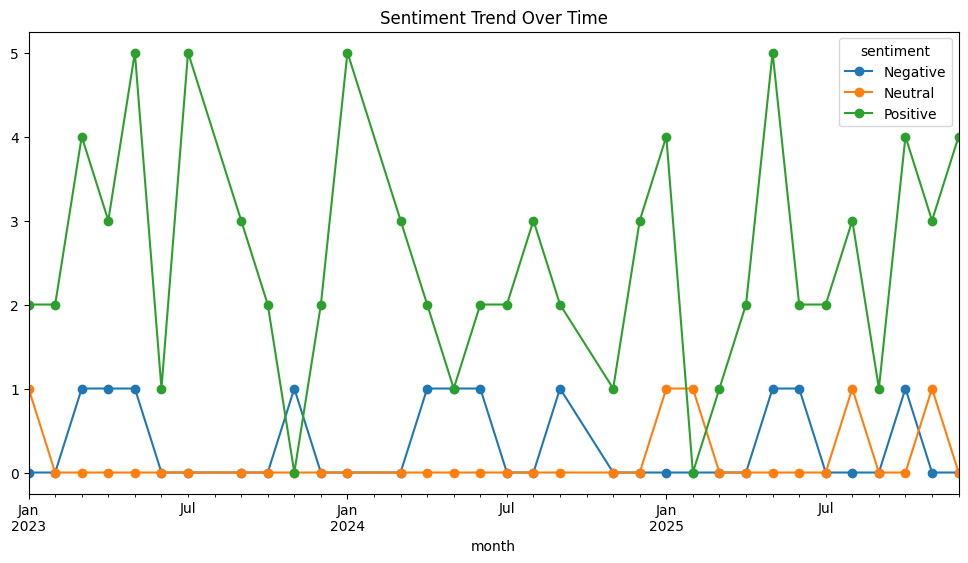

In [6]:
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df['month'] = df['ReviewDate'].dt.to_period('M')
sentiment_time = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

sentiment_time.plot(kind='line', marker='o', figsize=(12,6), title='Sentiment Trend Over Time')


## Word cloud for each sentiment

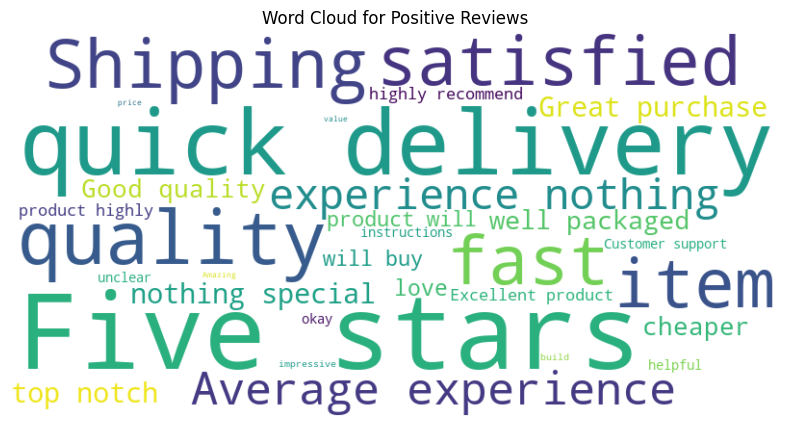

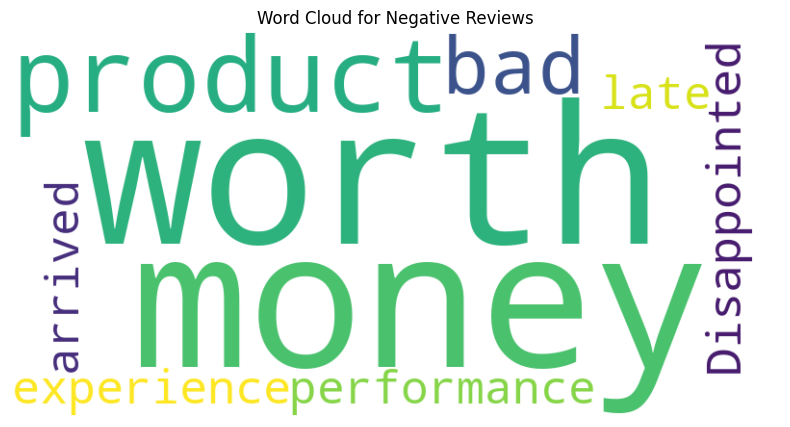

In [ ]:
for sentiment in ['Positive', 'Negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['ReviewText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()


## correlation between Ratings and Sentiment Scores

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df['compound'] = df['ReviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])
df[['Rating', 'compound']].corr()


,Rating,compound
Rating,1.000000,0.529547
compound,0.529547,1.000000


## Correlation review trends with product performance

In [ ]:
#  Correlate Review volume & Average Rating


# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="customer_behaviour_analysis"
)

cursor_mysql = conn.cursor()

query1 = """
SELECT 
    productid,
    COUNT(reviewid) AS total_reviews,
    AVG(rating) AS avg_rating
FROM 
    customer_reviews
GROUP BY 
    productid
ORDER BY 
    total_reviews DESC;
"""
cursor_mysql.execute(query1)
result1 = cursor_mysql.fetchall()
headers1 = ["Productid","Total_Reviews","Avg_Rating"]
print("\n Query 1 Result:")
print(tabulate(result1, headers=headers1, tablefmt="grid"))


 Query 1 Result:
+-------------+-----------------+--------------+
|   Productid |   Total_Reviews |   Avg_Rating |
+=============+=================+==============+
|          16 |              10 |       3.4    |
+-------------+-----------------+--------------+
|          13 |               9 |       3.6667 |
+-------------+-----------------+--------------+
|          17 |               9 |       3.8889 |
+-------------+-----------------+--------------+
|           2 |               7 |       3.5714 |
+-------------+-----------------+--------------+
|           6 |               7 |       3.8571 |
+-------------+-----------------+--------------+
|           3 |               7 |       3.7143 |
+-------------+-----------------+--------------+
|          15 |               6 |       4      |
+-------------+-----------------+--------------+
|          11 |               6 |       4      |
+-------------+-----------------+--------------+
|          19 |               5 |       4.4    |
+-

In [ ]:
# Query   Total reviews Vs Average rating
query = """
SELECT 
    productid,
    COUNT(reviewid) AS total_reviews,
    AVG(rating) AS avg_rating
FROM 
    customer_reviews
GROUP BY 
    productid;
"""

df = pd.read_sql(query, conn)
conn.close()


C:\Users\HP\AppData\Local\Temp\ipykernel_36216\3770897212.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### Total_reviews Vs Avg_rating Scatter plot

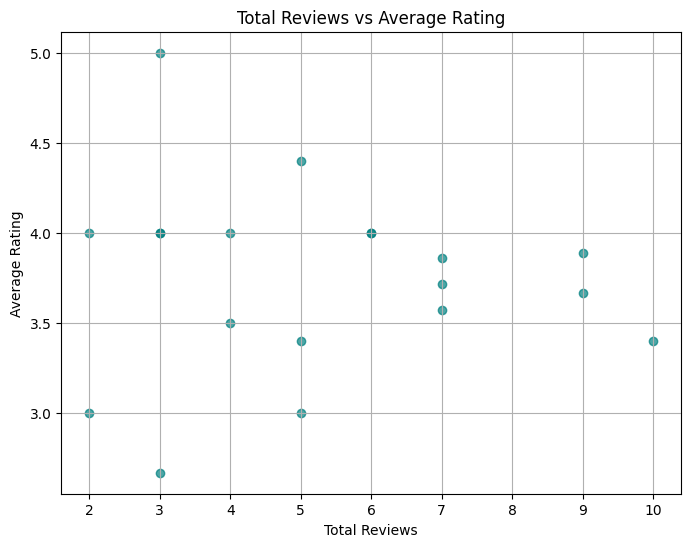

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['total_reviews'], df['avg_rating'], alpha=0.7, color='teal')
plt.title('Total Reviews vs Average Rating')
plt.xlabel('Total Reviews')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [19]:
print(df.columns)


Index(['productid', 'total_reviews', 'avg_rating'], dtype='object')


## Sentiment distribution heatmap

In [ ]:
from textblob import TextBlob
import pandas as pd

# Example:
df = pd.read_csv("Customer_Behaviour_Analysis\\customer_reviews.csv") 
print(df.head())  # should include a 'review_text' column

# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))  # convert to string in case of NaN
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment function
df['sentiment'] = df['ReviewText'].apply(get_sentiment)

# Count the sentiment distribution
print(df['sentiment'].value_counts())


   ReviewID  CustomerID  ProductID  ReviewDate  Rating  \
0         1          77         18  2023-12-23       3   
1         2          80         19  2024-12-25       5   
2         3          50         13  2025-01-26       4   
3         4          78         15  2025-04-21       3   
4         5          64          2  2023-07-16       3   

                                 ReviewText  
0   Average  experience,  nothing  special.  
1            The  quality  is    top-notch.  
2   Five  stars  for  the  quick  delivery.  
3  Good  quality,  but  could  be  cheaper.  
4   Average  experience,  nothing  special.  
sentiment
Positive    84
Negative    11
Neutral      5
Name: count, dtype: int64


In [21]:
sentiment_breakdown = df.groupby(['ProductID', 'sentiment']).agg(
    total_reviews=('ReviewID', 'count')
).reset_index()

print(sentiment_breakdown)


    ProductID sentiment  total_reviews
0           1  Positive              4
1           2  Negative              1
2           2   Neutral              1
3           2  Positive              5
4           3  Negative              1
5           3   Neutral              1
6           3  Positive              5
7           4  Negative              1
8           4   Neutral              1
9           4  Positive              3
10          5  Positive              3
11          6  Negative              1
12          6  Positive              6
13          7  Positive              3
14          8  Positive              3
15          9  Positive              5
16         10  Negative              1
17         10  Positive              3
18         11  Positive              6
19         12  Positive              2
20         13  Negative              1
21         13  Positive              8
22         15  Negative              1
23         15   Neutral              1
24         15  Positive  

In [22]:
# Step 1: Group by ProductID and sentiment
grouped = df.groupby(['ProductID', 'sentiment']).size().reset_index(name='review_count')

# Step 2: Pivot the table to get sentiments as columns
pivot_df = grouped.pivot(index='ProductID', columns='sentiment', values='review_count').fillna(0)

# Optional: Sort by ProductID
pivot_df = pivot_df.sort_index()


#### Sentiment distribution heatmap

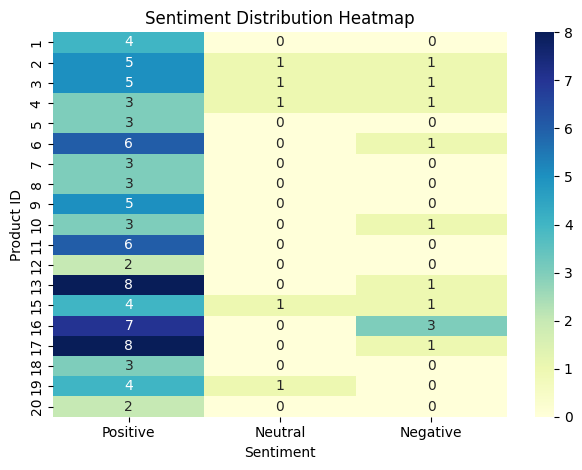

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pivot_df[['Positive', 'Neutral', 'Negative']], annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sentiment Distribution Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()


## Sentiment breakedown per product -- Stacked bar plot

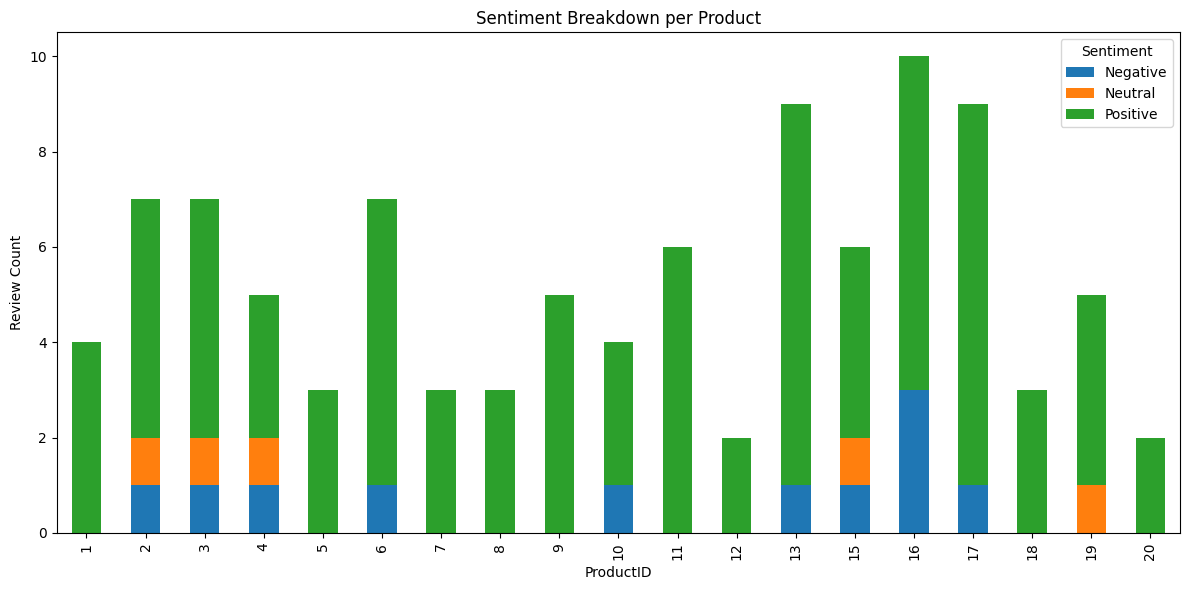

In [24]:
import matplotlib.pyplot as plt

# Group & Pivot code (if not already done)
grouped = df.groupby(['ProductID', 'sentiment']).size().reset_index(name='review_count')
pivot_df = grouped.pivot(index='ProductID', columns='sentiment', values='review_count').fillna(0)

# Plotting the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Sentiment Breakdown per Product')
plt.xlabel('ProductID')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


## Sentiment % Breakdown per Product

<Axes: xlabel='sentiment', ylabel='ProductID'>

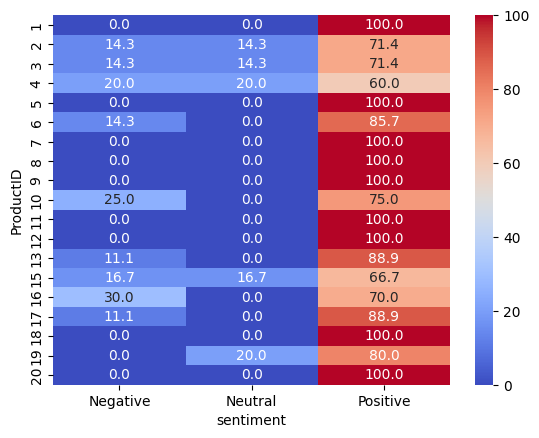

In [25]:
# Sentiment % Breakdown per Product

pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
sns.heatmap(pivot_df_percent, annot=True, fmt=".1f", cmap='coolwarm')


##  Highlights of best and worst performing products

In [33]:
# Calculate Average Rating + Sentiment Breakdown

# Average rating per product
avg_rating = df.groupby('ProductID')['Rating'].mean().reset_index()

# Sentiment counts per product
sentiment_counts = df.groupby(['ProductID', 'sentiment']).size().unstack(fill_value=0).reset_index()

# Merge both dataframes
product_summary = avg_rating.merge(sentiment_counts, on='ProductID')

# Optional: Calculate total reviews and sentiment percentages
product_summary['total_reviews'] = product_summary[['Positive', 'Neutral', 'Negative']].sum(axis=1)
product_summary['positive_pct'] = (product_summary['Positive'] / product_summary['total_reviews']) * 100
product_summary['negative_pct'] = (product_summary['Negative'] / product_summary['total_reviews']) * 100

product_summary.head()


,ProductID,Rating,Negative,Neutral,Positive,total_reviews,positive_pct,negative_pct
0,1,4.000000,0,0,4,4,100.000000,0.000000
1,2,3.571429,1,1,5,7,71.428571,14.285714
2,3,3.714286,1,1,5,7,71.428571,14.285714
3,4,3.000000,1,1,3,5,60.000000,20.000000
4,5,4.000000,0,0,3,3,100.000000,0.000000


In [ ]:
print(product_summary.columns)

Index(['ProductID', 'Rating', 'Negative', 'Neutral', 'Positive',
       'total_reviews', 'positive_pct', 'negative_pct'],
      dtype='object')


In [35]:
# Calculate avg rating per product
avg_rating_df = df.groupby('ProductID')['Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Rating': 'avg_rating'}, inplace=True)

# Merge with product_summary
product_summary = product_summary.merge(avg_rating_df, on='ProductID', how='left')


In [36]:
print(product_summary.columns)

Index(['ProductID', 'Rating', 'Negative', 'Neutral', 'Positive',
       'total_reviews', 'positive_pct', 'negative_pct', 'avg_rating'],
      dtype='object')


In [38]:
# Top 5 Best Performing Products
top_5_best = product_summary.sort_values(by=['avg_rating', 'positive_pct'], ascending=False).head(5)

# Top 5 Worst Performing Products
top_5_worst = product_summary.sort_values(by=['avg_rating', 'negative_pct'], ascending=[True, False]).head(5)

print("Best 5 Products:\n", top_5_best)
print("Worst 5 Products:\n", top_5_worst)


Best 5 Products:
     ProductID  Rating  Negative  Neutral  Positive  total_reviews  \
7           8     5.0         0        0         3              3   
17         19     4.4         0        1         4              5   
0           1     4.0         0        0         4              4   
4           5     4.0         0        0         3              3   
10         11     4.0         0        0         6              6   

    positive_pct  negative_pct  avg_rating  
7          100.0           0.0         5.0  
17          80.0           0.0         4.4  
0          100.0           0.0         4.0  
4          100.0           0.0         4.0  
10         100.0           0.0         4.0  
Worst 5 Products:
     ProductID    Rating  Negative  Neutral  Positive  total_reviews  \
6           7  2.666667         0        0         3              3   
3           4  3.000000         1        1         3              5   
11         12  3.000000         0        0         2             

In [40]:
from tabulate import tabulate

# Convert DataFrames to tabulated format
best_table = tabulate(top_5_best, headers='keys', tablefmt='pretty',showindex=False)
worst_table = tabulate(top_5_worst, headers='keys', tablefmt='pretty',showindex=False)

print(" Top 5 Best Performing Products ")
print(best_table)

print("\n Bottom 5 Worst Performing Products ")
print(worst_table)


 Top 5 Best Performing Products 
+-----------+--------+----------+---------+----------+---------------+--------------+--------------+------------+
| ProductID | Rating | Negative | Neutral | Positive | total_reviews | positive_pct | negative_pct | avg_rating |
+-----------+--------+----------+---------+----------+---------------+--------------+--------------+------------+
|    8.0    |  5.0   |   0.0    |   0.0   |   3.0    |      3.0      |    100.0     |     0.0      |    5.0     |
|   19.0    |  4.4   |   0.0    |   1.0   |   4.0    |      5.0      |     80.0     |     0.0      |    4.4     |
|    1.0    |  4.0   |   0.0    |   0.0   |   4.0    |      4.0      |    100.0     |     0.0      |    4.0     |
|    5.0    |  4.0   |   0.0    |   0.0   |   3.0    |      3.0      |    100.0     |     0.0      |    4.0     |
|   11.0    |  4.0   |   0.0    |   0.0   |   6.0    |      6.0      |    100.0     |     0.0      |    4.0     |
+-----------+--------+----------+---------+----------+-

## Estimating sales performance

In [7]:
## Estimating sales performance


# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="customer_behaviour_analysis"
)

cursor_mysql = conn.cursor()

query = """
SELECT cj.productid, p.productname, COUNT(*) AS checkout_count, p.price
FROM customer_journey cj
JOIN products p ON cj.productid = p.productid
WHERE cj.stage = 'Checkout'
GROUP BY cj.productid, p.productname, p.price
ORDER BY checkout_count DESC;"""
cursor_mysql.execute(query)
result = cursor_mysql.fetchall()
headers = ['Productid','Product_name','Checkout_count','Price']
print("\n Query  Result:")
print(tabulate(result, headers=headers, tablefmt="grid"))


 Query  Result:
+-------------+-----------------+------------------+---------+
|   Productid | Product_name    |   Checkout_count |   Price |
+=============+=================+==================+=========+
|          11 | Ski Boots       |                3 |  340.2  |
+-------------+-----------------+------------------+---------+
|          17 | Surfboard       |                3 |  275.43 |
+-------------+-----------------+------------------+---------+
|          20 | Boxing Gloves   |                3 |  262.32 |
+-------------+-----------------+------------------+---------+
|          15 | Climbing Rope   |                2 |  410.17 |
+-------------+-----------------+------------------+---------+
|          18 | Volleyball      |                2 |   42.8  |
+-------------+-----------------+------------------+---------+
|           2 | Fitness Tracker |                1 |  196.68 |
+-------------+-----------------+------------------+---------+
|           6 | Tennis Racket   |     

In [46]:
# Engagement per product

query2 = """
SELECT ed.productid, p.productname, COUNT(*) AS engagement_count
FROM engagement_data ed
JOIN products p ON ed.productid = p.productid
GROUP BY ed.productid, p.productname
ORDER BY engagement_count DESC;
"""
cursor_mysql.execute(query2)
result2 = cursor_mysql.fetchall()
headers2 = ['Productid','Product_name','Engagement_count']
print("\n Query 2 Result:")
print(tabulate(result2, headers=headers2, tablefmt="grid"))





 Query 2 Result:
+-------------+-----------------+--------------------+
|   Productid | Product_name    |   Engagement_count |
+=============+=================+====================+
|          16 | Kayak           |                  8 |
+-------------+-----------------+--------------------+
|           7 | Basketball      |                  8 |
+-------------+-----------------+--------------------+
|          20 | Boxing Gloves   |                  7 |
+-------------+-----------------+--------------------+
|          15 | Climbing Rope   |                  7 |
+-------------+-----------------+--------------------+
|           8 | Football Helmet |                  7 |
+-------------+-----------------+--------------------+
|           2 | Fitness Tracker |                  6 |
+-------------+-----------------+--------------------+
|          19 | Hockey Stick    |                  5 |
+-------------+-----------------+--------------------+
|           6 | Tennis Racket   |              

In [47]:
# Engagement Vs Checkout

query3 = """
SELECT 
    e.productid, 
    p.productname, 
    COUNT(e.productid) AS engagement_count,
    COUNT(c.productid) AS checkout_count
FROM engagement_data e
LEFT JOIN customer_journey c ON e.productid = c.productid AND c.stage = 'Checkout'
JOIN products p ON e.productid = p.productid
GROUP BY e.productid, p.productname
ORDER BY engagement_count DESC;
"""
cursor_mysql.execute(query3)
result3 = cursor_mysql.fetchall()
headers3 = ['Productid','product_name','Engagement_count','checkout_count']
print("\n Query 3 Result:")
print(tabulate(result3, headers=headers3, tablefmt="grid"))




 Query 3 Result:
+-------------+-----------------+--------------------+------------------+
|   Productid | product_name    |   Engagement_count |   checkout_count |
+=============+=================+====================+==================+
|          20 | Boxing Gloves   |                 21 |               21 |
+-------------+-----------------+--------------------+------------------+
|          17 | Surfboard       |                 15 |               15 |
+-------------+-----------------+--------------------+------------------+
|          15 | Climbing Rope   |                 14 |               14 |
+-------------+-----------------+--------------------+------------------+
|          16 | Kayak           |                  8 |                8 |
+-------------+-----------------+--------------------+------------------+
|          18 | Volleyball      |                  8 |                8 |
+-------------+-----------------+--------------------+------------------+
|           7 | Bask

In [ ]:
## Correlate Ratings & Conversion Rates

query4 = """
SELECT 
    e.productid, 
    p.productname, 
    COUNT(e.productid) AS engagement_count,
    COUNT(c.productid) AS checkout_count,
    ROUND((COUNT(c.productid) * 100.0) / NULLIF(COUNT(e.productid), 0), 2) AS conversion_rate,
    r.rating AS avg_rating
FROM engagement_data e
LEFT JOIN customer_journey c ON e.productid = c.productid AND c.stage = 'Checkout'
JOIN products p ON e.productid = p.productid
LEFT JOIN customer_reviews r ON e.productid = r.productid
GROUP BY e.productid, p.productname, r.rating
ORDER BY conversion_rate DESC;
"""
cursor_mysql.execute(query4)
result4 = cursor_mysql.fetchall()
headers4 = ['Productid','product_name','Engagement_count','checkout_count','Conversion_rate','Avg_rating']
print("\n Query 4 Result:")
print(tabulate(result4, headers=headers4, tablefmt="grid"))



 Query 4 Result:
+-------------+-----------------+--------------------+------------------+-------------------+--------------+
|   Productid | product_name    |   Engagement_count |   checkout_count |   Conversion_rate |   Avg_rating |
+=============+=================+====================+==================+===================+==============+
|           9 | Baseball Glove  |                 12 |               12 |               100 |            3 |
+-------------+-----------------+--------------------+------------------+-------------------+--------------+
|           9 | Baseball Glove  |                  8 |                8 |               100 |            4 |
+-------------+-----------------+--------------------+------------------+-------------------+--------------+
|          20 | Boxing Gloves   |                 42 |               42 |               100 |            4 |
+-------------+-----------------+--------------------+------------------+-------------------+--------------+
|

## Marketing Effectiveness

In [57]:
# Calculation of customer retention rate

query = """
WITH purchase_data AS (
    SELECT customerid, COUNT(DISTINCT visitdate) AS purchase_days
    FROM customer_journey
    WHERE stage = 'Checkout' AND action = 'Purchase'
    GROUP BY customerid
)
SELECT 
    COUNT(CASE WHEN purchase_days > 1 THEN 1 END) * 100.0 / COUNT(*) AS retention_rate
FROM purchase_data;
"""
cursor_mysql.execute(query)
result = cursor_mysql.fetchall()
headers = ['Retention_rate']
print("\n Query  Result:")
print(tabulate(result, headers=headers, tablefmt="grid"))


 Query  Result:
+------------------+
|   Retention_rate |
+==================+
|                0 |
+------------------+


In [8]:
#  Customers those who have made purchase

query2 = """
SELECT customerid, COUNT(DISTINCT visitdate) AS purchase_days
FROM customer_journey
WHERE stage = 'Checkout' AND action = 'Purchase'
GROUP BY customerid;
"""
cursor_mysql.execute(query2)
result2 = cursor_mysql.fetchall()
headers2 = ['customerid','purchase_days']
print("\n Query 2 Result:")
print(tabulate(result2, headers=headers2, tablefmt="grid"))


 Query 2 Result:
+--------------+-----------------+
|   customerid |   purchase_days |
+==============+=================+
|           17 |               1 |
+--------------+-----------------+
|           42 |               1 |
+--------------+-----------------+
|           46 |               1 |
+--------------+-----------------+
|           58 |               1 |
+--------------+-----------------+
|           79 |               1 |
+--------------+-----------------+
|           89 |               1 |
+--------------+-----------------+


In [ ]:
#  Compare First-Time buyers Vs Repeat buyers

query = """
SELECT 
    'First-Time Buyers' AS Category, 
    COUNT(DISTINCT customerid) AS Customer_Count
FROM customer_journey 
WHERE stage = 'Checkout' AND action = 'Purchase' 
UNION 
SELECT 
    'Repeat Buyers' AS Category, 
    0 AS Customer_Count;
"""
cursor_mysql.execute(query)
result = cursor_mysql.fetchall()
headers = ['Category','Customer_count']
print("\n Query  Result:")
print(tabulate(result, headers=headers, tablefmt="grid"))


 Query  Result:
+-------------------+------------------+
| Category          |   Customer_count |
+===================+==================+
| First-Time Buyers |                6 |
+-------------------+------------------+
| Repeat Buyers     |                0 |
+-------------------+------------------+


In [66]:
# Best performing products per region

query = """
WITH product_sales AS (
    SELECT 
        g.country,
        g.city,
        cj.productid,
        COUNT(*) AS total_purchases
    FROM customer_journey cj
    JOIN customers c ON cj.customerid = c.customerid
    JOIN geography g ON c.geographyid = g.geographyid
    WHERE cj.stage = 'Checkout' AND cj.action = 'Purchase'
    GROUP BY g.country, g.city, cj.productid
)
SELECT 
    country,
    city,
    productid,
    total_purchases
FROM product_sales
WHERE (country, city, total_purchases) IN (
    SELECT country, city, MAX(total_purchases)
    FROM product_sales
    GROUP BY country, city
)
ORDER BY country, city, total_purchases DESC;
"""
cursor_mysql.execute(query)
result = cursor_mysql.fetchall()
headers = ['Country','City','Product_id','Total_Purchases']
print("\n Query  Result:")
print(tabulate(result, headers=headers, tablefmt="grid"))


 Query  Result:
+-------------+-----------+--------------+-------------------+
| Country     | City      |   Product_id |   Total_Purchases |
+=============+===========+==============+===================+
| Austria     | Vienna    |           16 |                 1 |
+-------------+-----------+--------------+-------------------+
| Germany     | Berlin    |            2 |                 1 |
+-------------+-----------+--------------+-------------------+
| Netherlands | Amsterdam |           15 |                 1 |
+-------------+-----------+--------------+-------------------+
| Spain       | Madrid    |           17 |                 1 |
+-------------+-----------+--------------+-------------------+
| Sweden      | Stockholm |           15 |                 1 |
+-------------+-----------+--------------+-------------------+
| UK          | London    |           17 |                 1 |
+-------------+-----------+--------------+-------------------+
